In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [10]:
# Connect to SQL database
engine = create_engine('sqlite:///transactions.db')
df = pd.read_csv('creditcard.csv')

#Store it in the database as a table
df.to_sql('creditcard', con=engine, if_exists='replace', index=False)

print("✅ CSV loaded into database successfully!")
df = pd.read_sql('SELECT * FROM creditcard', engine)
print(df.head())

✅ CSV loaded into database successfully!
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.20

In [9]:
# Basic inspection
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# Handling missing values
print(df.isnull().sum())
df = df.dropna()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [14]:
#imbalance analysis
print(df['Class'].value_counts(normalize=True))
#here class 1=Fraud(0.001727 i.e.,0.17%) & 0=Non Fraud(0.998 i.e., 99.82%)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


<Axes: xlabel='Class', ylabel='count'>

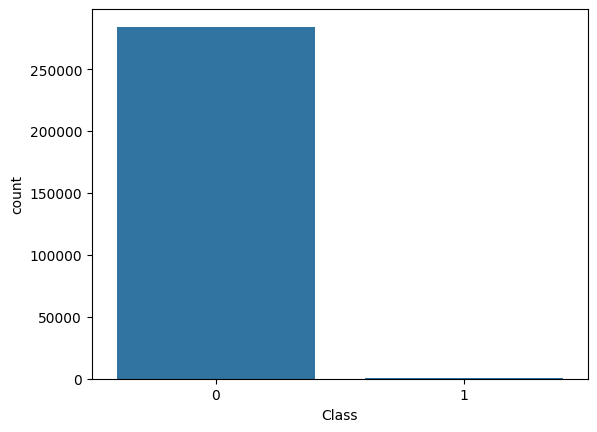

In [18]:
#plotting imbalance

sns.countplot(x='Class', data=df)


UNIVARIATE and Bivariate Analysis

<Axes: xlabel='Amount', ylabel='Count'>

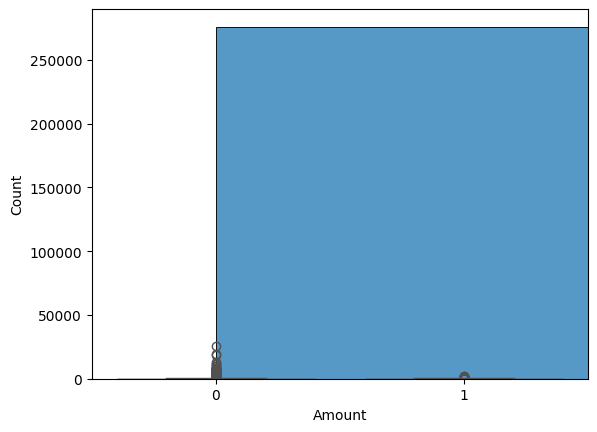

In [22]:
#Univariate Plots

sns.histplot(df['Amount'], bins=50)
sns.boxplot(x='Class', y='Amount', data=df)

<Axes: >

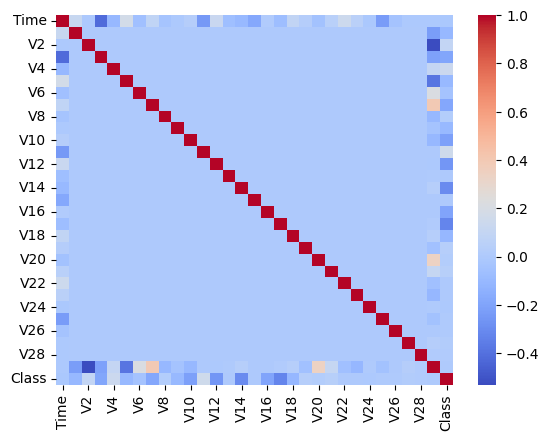

In [23]:
#Bivariate analysis
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
#correlation heatmaps

In [24]:
corr_with_class = corr['Class'].sort_values(key=abs, ascending=False)
print(corr_with_class)
#V17, V14, V12,& V10 these have the strongest negative correlation with fraud

Class     1.000000
V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V11       0.154876
V4        0.133447
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V2        0.091289
V6       -0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time     -0.012323
V28       0.009536
V24      -0.007221
Amount    0.005632
V13      -0.004570
V26       0.004455
V15      -0.004223
V25       0.003308
V23      -0.002685
V22       0.000805
Name: Class, dtype: float64


In [ ]:
# Correct data types
#df['transaction_date'] = pd.to_datetime(df['transaction_date'])